In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tqdm import tqdm
import random
#from tf.keras.layersConvLSTM1D
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.2.0


In [32]:

# seed for reproducing same results
seed = 9
np.random.seed(seed)
norm ='Normalized_feature_full.csv'
raw ="feature_full.csv"
less= 'lessSmote.csv'
# load pima indians dataset
dataset = np.loadtxt(norm, delimiter=',', skiprows=1)

# split into input and output variables
X = dataset[:, 0:-1]
Y = dataset[:,-1]

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=seed)
for i in range(len(Y_train)):
    Y_train[i] = int(Y_train[i])-1
    
for i in range(len(Y_test)):
    Y_test[i] = int(Y_test[i])-1
    
from tensorflow.keras.utils import to_categorical
Y_test = to_categorical(Y_test)
print(Y_test)
Y_train = to_categorical(Y_train)
print(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train=Y_train
y_test=Y_test

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [33]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old = 0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_Conv1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
                
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(16, (5),activation='relu',strides =1,padding="same", input_shape=[21,1]),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8192,verbose =1)#, callbacks = [red_lr])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 21, 16)            96        
_________________________________________________________________
lstm_4 (LSTM)                (None, 21, 128)           74240     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2688)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 10756     
Total params: 85,092
Trainable params: 85,092
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
27/27 [==============================] - 3s 103ms/step - loss: 0.8363 - acc: 0.6554 - val_loss: 0.6830 - val_acc: 0.7472
Epoch 2/200
27/27 [==============================] - 2s 84ms/step - loss: 0.6353 - acc: 0.7657 - val_loss: 0.5848 -

27/27 [==============================] - 2s 89ms/step - loss: 0.3605 - acc: 0.8693 - val_loss: 0.3638 - val_acc: 0.8695
Epoch 57/200
27/27 [==============================] - 2s 91ms/step - loss: 0.3594 - acc: 0.8685 - val_loss: 0.3675 - val_acc: 0.8641
Epoch 58/200
27/27 [==============================] - 2s 89ms/step - loss: 0.3673 - acc: 0.8658 - val_loss: 0.3620 - val_acc: 0.8735
Epoch 59/200
27/27 [==============================] - 3s 93ms/step - loss: 0.3693 - acc: 0.8665 - val_loss: 0.3638 - val_acc: 0.8702
Epoch 60/200
27/27 [==============================] - 2s 90ms/step - loss: 0.3652 - acc: 0.8682 - val_loss: 0.3586 - val_acc: 0.8711
Epoch 61/200
27/27 [==============================] - 2s 89ms/step - loss: 0.3651 - acc: 0.8678 - val_loss: 0.3568 - val_acc: 0.8759
Epoch 62/200
27/27 [==============================] - 2s 85ms/step - loss: 0.3618 - acc: 0.8700 - val_loss: 0.3608 - val_acc: 0.8691
Epoch 63/200
27/27 [==============================] - 2s 85ms/step - loss: 0.3660 

27/27 [==============================] - 2s 85ms/step - loss: 0.3380 - acc: 0.8775 - val_loss: 0.3458 - val_acc: 0.8711
Epoch 179/200
27/27 [==============================] - 2s 85ms/step - loss: 0.3406 - acc: 0.8756 - val_loss: 0.3355 - val_acc: 0.8812
Epoch 180/200
27/27 [==============================] - 2s 85ms/step - loss: 0.3357 - acc: 0.8779 - val_loss: 0.3345 - val_acc: 0.8800
Epoch 181/200
27/27 [==============================] - 2s 85ms/step - loss: 0.3398 - acc: 0.8750 - val_loss: 0.3317 - val_acc: 0.8782
Epoch 182/200
27/27 [==============================] - 2s 85ms/step - loss: 0.3355 - acc: 0.8770 - val_loss: 0.3446 - val_acc: 0.8764
Epoch 183/200
27/27 [==============================] - 2s 85ms/step - loss: 0.3356 - acc: 0.8779 - val_loss: 0.3323 - val_acc: 0.8829
Epoch 184/200
27/27 [==============================] - 2s 85ms/step - loss: 0.3414 - acc: 0.8766 - val_loss: 0.3466 - val_acc: 0.8735
Epoch 185/200
27/27 [==============================] - 2s 85ms/step - loss: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


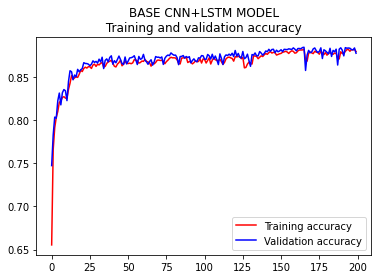

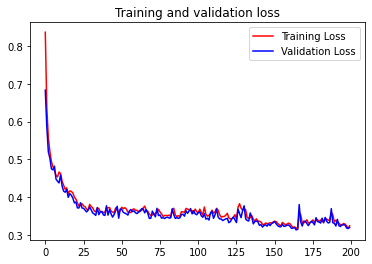

average_accuracy= 0.8695878922939301
precision= 0.8841317296028137
average_loss= 0.3579727737605572


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('BASE CNN+LSTM MODEL\n Training and validation accuracy ')
plt.legend()
plt.savefig('./images/FIG_1/A1.eps', format='eps',dpi=1000)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_1/A2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [35]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8192,verbose =1)#, callbacks = [red_lr])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_3 (Local (None, 17, 16)            1632      
_________________________________________________________________
lstm_5 (LSTM)                (None, 17, 128)           74240     
_________________________________________________________________
flatten_5 (Flatten)          (None, 2176)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 8708      
Total params: 84,580
Trainable params: 84,580
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
27/27 [==============================] - 3s 98ms/step - loss: 0.8252 - acc: 0.6716 - val_loss: 0.6618 - val_acc: 0.7511
Epoch 2/200
27/27 [==============================] - 2s 73ms/step - loss: 0.6193 - acc: 0.7699 - val_loss: 0.5583 - 

27/27 [==============================] - 2s 73ms/step - loss: 0.3168 - acc: 0.8769 - val_loss: 0.3111 - val_acc: 0.8799
Epoch 57/200
27/27 [==============================] - 2s 72ms/step - loss: 0.3155 - acc: 0.8770 - val_loss: 0.3116 - val_acc: 0.8800
Epoch 58/200
27/27 [==============================] - 2s 72ms/step - loss: 0.3175 - acc: 0.8777 - val_loss: 0.3170 - val_acc: 0.8811
Epoch 59/200
27/27 [==============================] - 2s 72ms/step - loss: 0.3207 - acc: 0.8770 - val_loss: 0.3152 - val_acc: 0.8801
Epoch 60/200
27/27 [==============================] - 2s 72ms/step - loss: 0.3194 - acc: 0.8773 - val_loss: 0.3161 - val_acc: 0.8766
Epoch 61/200
27/27 [==============================] - 2s 72ms/step - loss: 0.3220 - acc: 0.8769 - val_loss: 0.3179 - val_acc: 0.8812
Epoch 62/200
27/27 [==============================] - 2s 72ms/step - loss: 0.3208 - acc: 0.8773 - val_loss: 0.3104 - val_acc: 0.8824
Epoch 63/200
27/27 [==============================] - 2s 72ms/step - loss: 0.3155 

Epoch 178/200
27/27 [==============================] - 2s 72ms/step - loss: 0.2781 - acc: 0.8934 - val_loss: 0.2776 - val_acc: 0.8930
Epoch 179/200
27/27 [==============================] - ETA: 0s - loss: 0.2785 - acc: 0.892 - 2s 72ms/step - loss: 0.2785 - acc: 0.8921 - val_loss: 0.2769 - val_acc: 0.8962
Epoch 180/200
27/27 [==============================] - 2s 72ms/step - loss: 0.2917 - acc: 0.8870 - val_loss: 0.2873 - val_acc: 0.8900
Epoch 181/200
27/27 [==============================] - 2s 73ms/step - loss: 0.2861 - acc: 0.8894 - val_loss: 0.2793 - val_acc: 0.8928
Epoch 182/200
27/27 [==============================] - 2s 73ms/step - loss: 0.2808 - acc: 0.8906 - val_loss: 0.2749 - val_acc: 0.8943
Epoch 183/200
27/27 [==============================] - 2s 72ms/step - loss: 0.2743 - acc: 0.8940 - val_loss: 0.2744 - val_acc: 0.8936
Epoch 184/200
27/27 [==============================] - 2s 72ms/step - loss: 0.2774 - acc: 0.8937 - val_loss: 0.2767 - val_acc: 0.8937
Epoch 185/200
27/27 [===

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


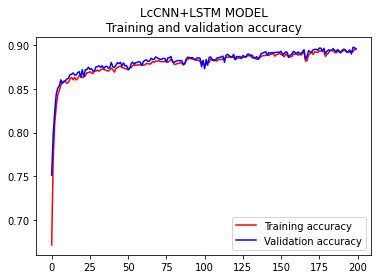

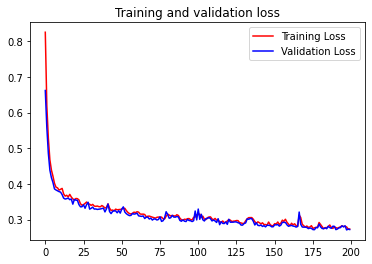

average_accuracy= 0.8816526845097542
precision= 0.8973945379257202
average_loss= 0.3103564789891243


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+LSTM MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_1/B1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_1/B2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [37]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
#88.92
model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1)#, callbacks = [red_lr,saver])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_4 (Local (None, 17, 16)            1632      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 17, 256)           148480    
_________________________________________________________________
flatten_6 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 17412     
Total params: 167,524
Trainable params: 167,524
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
221/221 [==============================] - 6s 27ms/step - loss: 0.5184 - acc: 0.8089 - val_loss: 0.4042 - val_acc: 0.8543
Epoch 2/200
221/221 [==============================] - 5s 24ms/step - loss: 0.4046 - acc: 0.8498 - val_loss: 0.4

221/221 [==============================] - 5s 25ms/step - loss: 0.2761 - acc: 0.8917 - val_loss: 0.2695 - val_acc: 0.8941
Epoch 116/200
221/221 [==============================] - 5s 24ms/step - loss: 0.2737 - acc: 0.8935 - val_loss: 0.2747 - val_acc: 0.8955
Epoch 117/200
221/221 [==============================] - 5s 24ms/step - loss: 0.2746 - acc: 0.8938 - val_loss: 0.2697 - val_acc: 0.8963
Epoch 118/200
221/221 [==============================] - 5s 25ms/step - loss: 0.2725 - acc: 0.8936 - val_loss: 0.2699 - val_acc: 0.8957
Epoch 119/200
221/221 [==============================] - 5s 24ms/step - loss: 0.2765 - acc: 0.8921 - val_loss: 0.2745 - val_acc: 0.8936
Epoch 120/200
221/221 [==============================] - 5s 24ms/step - loss: 0.2729 - acc: 0.8934 - val_loss: 0.2752 - val_acc: 0.8961
Epoch 121/200
221/221 [==============================] - 5s 24ms/step - loss: 0.2706 - acc: 0.8946 - val_loss: 0.2894 - val_acc: 0.8845
Epoch 122/200
221/221 [==============================] - 5s 24

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


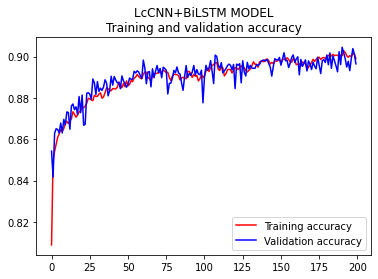

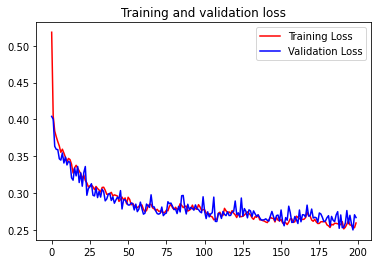

average_accuracy= 0.890374147593975
precision= 0.904478907585144
average_loss= 0.2839568157494068


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+BiLSTM MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_1/C1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_1/C2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [39]:
red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
old =0
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            global old
            if(logs.get('val_acc') > old):
                model.save('NF_LocallyConnected1D.h5',overwrite=True)
                old = logs.get('val_acc')
saver =myCallback()
#88.92
model = tf.keras.models.Sequential([
    tf.keras.layers.LocallyConnected1D(16, (5),activation='relu',strides =1,padding="valid", input_shape=[21,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(4, activation='softmax')
    ])
model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1, callbacks = [red_lr])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
locally_connected1d_5 (Local (None, 17, 16)            1632      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 17, 256)           148480    
_________________________________________________________________
flatten_7 (Flatten)          (None, 4352)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 17412     
Total params: 167,524
Trainable params: 167,524
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
221/221 [==============================] - 6s 27ms/step - loss: 0.4860 - acc: 0.8226 - val_loss: 0.3859 - val_acc: 0.8539 - lr: 0.0010
Epoch 2/200
221/221 [==============================] - 5s 24ms/step - loss: 0.3862 - acc: 0.8532 - 

Epoch 99/200
221/221 [==============================] - 5s 24ms/step - loss: 0.2453 - acc: 0.9044 - val_loss: 0.2478 - val_acc: 0.9040 - lr: 1.0000e-04
Epoch 100/200
221/221 [==============================] - 5s 23ms/step - loss: 0.2448 - acc: 0.9046 - val_loss: 0.2442 - val_acc: 0.9058 - lr: 1.0000e-04
Epoch 101/200
221/221 [==============================] - 5s 24ms/step - loss: 0.2446 - acc: 0.9054 - val_loss: 0.2440 - val_acc: 0.9051 - lr: 1.0000e-04
Epoch 102/200
221/221 [==============================] - 5s 25ms/step - loss: 0.2442 - acc: 0.9049 - val_loss: 0.2433 - val_acc: 0.9058 - lr: 1.0000e-04
Epoch 103/200
221/221 [==============================] - 6s 25ms/step - loss: 0.2434 - acc: 0.9058 - val_loss: 0.2424 - val_acc: 0.9071 - lr: 1.0000e-04
Epoch 104/200
221/221 [==============================] - 5s 24ms/step - loss: 0.2434 - acc: 0.9051 - val_loss: 0.2444 - val_acc: 0.9051 - lr: 1.0000e-04
Epoch 105/200
221/221 [==============================] - 5s 24ms/step - loss: 0.243

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


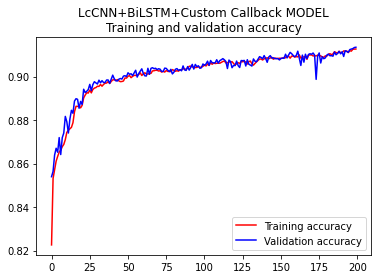

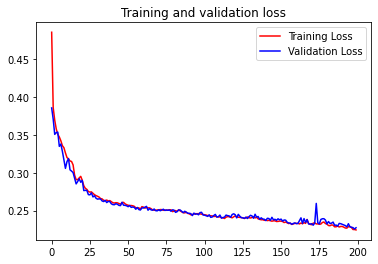

average_accuracy= 0.9020533782243728
precision= 0.9134657382965088
average_loss= 0.25326111540198326


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LcCNN+BiLSTM+Custom Callback MODEL\nTraining and validation accuracy')
plt.savefig('./images/FIG_1/D1.eps', format='eps',dpi=1000)
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('./images/FIG_1/D2.eps', format='eps',dpi=1000)
plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)


In [41]:
# red_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,mode='auto', min_delta=0.01,min_lr=0.0001)
# old =0
# class myCallback(tf.keras.callbacks.Callback):
#         def on_epoch_end(self,epoch,logs={}):
#             global old
#             if(logs.get('val_acc') > old):
#                 model.save('NF_LocallyConnected1D.h5',overwrite=True)
#                 old = logs.get('val_acc')
# saver =myCallback()
# #88.92
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv1D(16, (5),activation='relu',strides =1,padding="same", input_shape=[21,1]),
#     #tf.keras.layers.MaxPooling1D(2),
#     #tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
#     tf.keras.layers.Conv1D(16, (3),activation='relu',strides =1,padding="same"),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
#     tf.keras.layers.Conv1D(8, (2),activation='relu',strides =1,padding="same"),
#     tf.keras.layers.MaxPooling1D(2),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Flatten(),
#                                                                         #acc=89.36 at 80th
#                                                                         #acc=89.40 at 120th
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(4, activation='softmax')
#     ])
# model.compile(optimizer='adam'  ,loss='categorical_crossentropy', metrics=['acc'])
# model.summary()
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1000,verbose =1, callbacks = [red_lr])

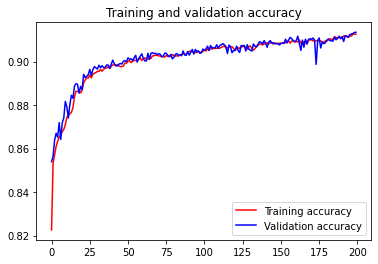

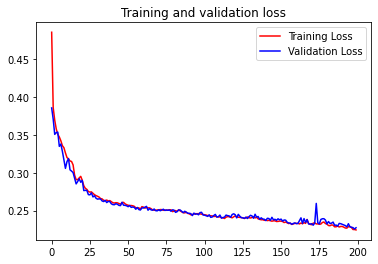

average_accuracy= 0.9020533782243728
precision= 0.9134657382965088
average_loss= 0.25326111540198326


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
average_accuracy=sum(history.history['val_acc'])/len(history.history['val_acc'])
precision = max(history.history['val_acc'])
print("average_accuracy=",average_accuracy)
print("precision=",precision)
average_loss=sum(history.history['val_loss'])/len(history.history['val_loss'])
print("average_loss=",average_loss)
